In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
sb.set()
import pandas as pd
import unidecode, unidecode
import datetime
%matplotlib inline

In [2]:
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

In [3]:
REPLACE_WITH = "sin informacion"

## 1.1 Utils

In [4]:
#Variables categoricas
def ver_atributo_categorico(df, col, limit=False, lim=10, hue=None, palette=None, log=False, f=None):
    l = df[col].unique().tolist()
    l_len = len(l)
    
    if log:
        print(df[col].nunique(), l)
    
    sb.set_color_codes("muted")
    
    if f==None: 
        f = plt.figure(figsize=(4,3))
    
    if limit:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:lim],hue=hue,palette=palette);
    else:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:l_len],hue=hue,palette=palette);

# Para usar en pattern_clean y contar valores mal formados en atributos categoricos
to_replace = ['Sin Información','a', '.', 'c', 'No indicado', 'No indica', 'n',
             'jdpqdp', 'no indicado', '*', 'fff', 'xxxx', 'eee', 
              'x', 'm', 'nn', 'rrr', 'wwwww', 'www', 0, 'k',]

def nulos_n_unicos(columna, cot_mod):
    print('Nulos', cot_mod[cot_mod[columna].isnull()].shape[0])
    print('No nulos', cot_mod[~cot_mod[columna].isnull()].shape[0])
    print('Unicos', cot_mod[columna].nunique())
    
    
def easy_clean(columna, cot_mod):
    print('Nulos', cot_mod[cot_mod[columna].isnull()].shape[0])
    cot_mod[columna].fillna(REPLACE_WITH, inplace=True)
    print('Easy Cleaned: ',cot_mod[cot_mod[columna].isnull()].shape)
    print('No nulos', cot_mod[~cot_mod[columna].isnull()].shape[0])
    
to_replace_space = ['\xa0']

def malformed_values(col, cot_all):
    i=0
    for value in cot_all[col].tolist():
        if value in to_replace:
            i+=1
    print('Malformed values: ',i)

def pattern_clean(columna, cot_mod):
    cot_mod[columna].replace(
        to_replace,
        REPLACE_WITH, inplace=True, regex=False
    )

    cot_mod[columna].replace(
        to_replace_space,
        '', inplace=True, regex=True
    )
    
def view_malformations(columna, str_len, cot_mod):
    mask = (cot_mod[columna].str.len() < str_len)
    print(cot_mod[mask][columna].shape[0])
    print(cot_mod[mask][columna].tolist())

# MACRO CLEAN

In [5]:
# cot_mod = pd.read_excel("..\\..\\Datos\\initial\\cotizaciones_all.xlsx")
# neg_mod = pd.read_excel("..\\..\\Datos\\initial\\negocios_all.xlsx")

In [6]:
# cot_mod.to_csv("..\\..\\Datos\\initial\\cotizaciones_all.csv")
# neg_mod.to_csv("..\\..\\Datos\\initial\\negocios_all.csv")

In [7]:
cot_mod = pd.read_csv("..\\..\\Datos\\initial\\cotizaciones_all.csv", index_col=[0], encoding = "ISO-8859-1")
neg_mod = pd.read_csv("..\\..\\Datos\\initial\\negocios_all.csv", index_col=[0], encoding = "ISO-8859-1")


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#COTIZACIONES

In [9]:
cot_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16592 entries, 0 to 2916
Data columns (total 41 columns):
ID                     16592 non-null int64
Fecha Cotizacion       16592 non-null object
Medio                  16592 non-null object
Tipo de Medio          16060 non-null object
Proyecto               16592 non-null object
Etapa                  16592 non-null object
Productos              16509 non-null object
Presencial             14565 non-null object
Remoto                 13282 non-null object
Jefe Comercial         16592 non-null object
Ejecutivo Comercial    16592 non-null object
Total Productos        16562 non-null float64
Descuentos             16548 non-null float64
Valor Final Venta      16548 non-null float64
RUT                    16592 non-null object
Nombre                 16592 non-null object
Apellido 1             16553 non-null object
Apellido 2             16185 non-null object
Nombre Completo        16592 non-null object
Telefono               1994 non-nul

In [10]:
#Columnas sin Nulos
null_columns = cot_mod.columns[~cot_mod.isnull().any()]
cot_mod[null_columns].isnull().sum().index

Index(['ID', 'Fecha Cotizacion', 'Medio', 'Proyecto', 'Etapa',
       'Jefe Comercial', 'Ejecutivo Comercial', 'RUT', 'Nombre',
       'Nombre Completo', 'Region', 'Provincia', 'Comuna'],
      dtype='object')

In [11]:
#Columnas sin Nulos
null_columns = cot_mod.columns[cot_mod.isnull().any()]
print(cot_mod[null_columns].isnull().sum().index)
cot_mod[null_columns].isnull().sum().sort_values()

Index(['Tipo de Medio', 'Productos', 'Presencial', 'Remoto', 'Total Productos',
       'Descuentos', 'Valor Final Venta', 'Apellido 1', 'Apellido 2',
       'Telefono', 'Celular', 'Direccion', 'Correo Electronico', 'Sexo',
       'Estado Civil', 'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente',
       'Razon Social', 'Giro', 'Nacionalidad', 'N° Grupo Familiar',
       'Actividad', 'Cargo', 'Situacion Laboral', 'Empleador',
       'Antiguedad Laboral', 'Profesión'],
      dtype='object')


Tipo Cliente              1
Correo Electronico        5
Total Productos          30
Celular                  38
Apellido 1               39
Descuentos               44
Valor Final Venta        44
Productos                83
Antiguedad Laboral      172
Apellido 2              407
Tipo de Medio           532
Sexo                   1869
Rango Edad             1980
Presencial             2027
Estado Civil           2049
Actividad              2350
Remoto                 3310
N° Grupo Familiar      5964
Profesión              9226
Direccion             11384
Nacionalidad          11744
Fecha Nacimiento      12701
Situacion Laboral     12795
Empleador             13588
Cargo                 13771
Telefono              14598
Razon Social          16552
Giro                  16559
dtype: int64

In [12]:
# Macro Prepros

for column in cot_mod.columns:
    if cot_mod[column].dtype == object:
        cot_mod[column] = cot_mod[column].str.lower()
        cot_mod[column].replace({
                'á':'a', 
                'é':'e', 
                'í':'i', 
                'ó':'o', 
                'ú':'u', 
                'ñ':'n', '\xa0':''}, regex=True, inplace=True)
        cot_mod[column].replace(['sin informacion', '', '.', '-', '*', '..', '...', '....'], np.nan, inplace=True)

In [13]:
#Columnas sin Nulos
null_columns = cot_mod.columns[~cot_mod.isnull().any()]
cot_mod[null_columns].isnull().sum().index

Index(['ID', 'Fecha Cotizacion', 'Medio', 'Proyecto', 'Etapa',
       'Jefe Comercial', 'Ejecutivo Comercial', 'RUT', 'Nombre Completo',
       'Region', 'Provincia', 'Comuna'],
      dtype='object')

In [14]:
#Columnas sin Nulos
null_columns = cot_mod.columns[cot_mod.isnull().any()]
print(cot_mod[null_columns].isnull().sum().index)
cot_mod[null_columns].isnull().sum().sort_values()

Index(['Tipo de Medio', 'Productos', 'Presencial', 'Remoto', 'Total Productos',
       'Descuentos', 'Valor Final Venta', 'Nombre', 'Apellido 1', 'Apellido 2',
       'Telefono', 'Celular', 'Direccion', 'Correo Electronico', 'Sexo',
       'Estado Civil', 'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente',
       'Razon Social', 'Giro', 'Nacionalidad', 'N° Grupo Familiar',
       'Actividad', 'Cargo', 'Situacion Laboral', 'Empleador',
       'Antiguedad Laboral', 'Profesión'],
      dtype='object')


Tipo Cliente              1
Nombre                    3
Total Productos          30
Apellido 1               42
Descuentos               44
Valor Final Venta        44
Correo Electronico       60
Celular                  73
Productos                83
Antiguedad Laboral      172
Tipo de Medio           532
Apellido 2             1997
Presencial             2027
Sexo                   2147
Actividad              2350
Remoto                 3310
Rango Edad             5650
Estado Civil           7114
Profesión              9226
N° Grupo Familiar      9676
Direccion             11386
Nacionalidad          11749
Fecha Nacimiento      12701
Situacion Laboral     12942
Empleador             13858
Cargo                 14005
Telefono              14894
Razon Social          16557
Giro                  16559
dtype: int64

# INDIVIDUAL CLEAN

Nulos 1
No nulos 16591
Unicos 2
Malformed values:  0
2 ['natural', 'juridico', nan]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


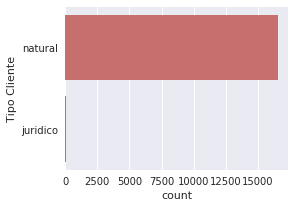

In [15]:
col = 'Tipo Cliente'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 3
No nulos 16589
Unicos 2169
Malformed values:  0
1
['li']
2169 ['nelda del carmen', 'cecilia', 'yeni', 'maria mercedes', 'john rodrigo', 'zarah', 'helena', 'carlos', 'leslie andrea', 'consuelo ivonne', 'fabiola andrea', 'maria de la luz', 'carlos alberto', 'alejandro antonio', 'cesar antonio', 'jose eduardo', 'guido arcides', 'pilar andrea', 'robinson antonio', 'marcos alex', 'hector', 'maria jose', 'rodolfo', 'erwin alejandro', 'enzo antonio', 'ana maria', 'patricio bladimir', 'gabriel alejandro', 'anibal antonio', 'cristian', 'antonella', 'claudio', 'pia', 'pamela', 'ktty alejandra', 'anselmo', 'camila', 'francisco', 'vanesa', 'carmen', 'luis', 'nicolas', 'teresa del carmen', 'maria alejandra', 'carolina', 'patricia angelica', 'javier israel', 'gerardo andres', 'gianinna fatme', 'osvaldo nicolas', 'claudia', 'henry', 'gloria celina fernanda', 'sindy', 'jordan sebastian', 'patricio', 'alejandra', 'julia del carmen', 'eduardo fernando', 'sonia del rosario', 'dante', 'douglas', '

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


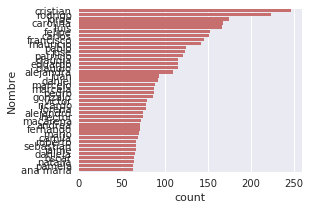

In [18]:
col = 'Nombre'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 3, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

float64
Nulos 30
No nulos 16562
Unicos 2195
Malformed values:  15
2195 [2121.0, 4176.0, 3522.0, 4156.0, 3235.0, 4312.0, 3291.0, 3681.0, 2905.0, 3699.0, 430.0, 660.0, 780.0, 390.0, 720.0, 330.0, 8554.0, 2123.0, 2183.0, 3787.0, 1793.0, 3693.0, 3369.0, 3790.0, 3683.0, 3192.0, 1703.0, 4028.0, 3988.0, 4334.0, 3295.0, 3759.0, 3900.0, 4290.0, 2496.0, 7263.0, 3613.0, 2400.0, 2277.0, 2046.0, 7695.0, 3358.0, 3582.0, 3356.0, 3120.0, 3255.0, 1820.0, 3928.0, 2093.0, 3405.0, 2860.0, 2957.0, 1947.0, 4180.0, 3457.0, 2966.0, 3330.0, 2141.0, 3948.0, 2170.0, 3468.0, 3957.0, 4098.0, 4400.0, 4570.0, 3922.0, 2210.0, 2337.0, 3753.0, 4379.0, 4378.0, 4680.0, 4790.0, 3598.0, 3743.0, 3360.0, 3400.0, 3670.0, 2349.0, 2389.0, 3807.0, 3971.0, 4101.0, 4399.0, 2297.0, 3847.0, 3962.0, 3641.0, 3837.0, 4107.0, 4457.0, 2730.0, 1900.0, 3834.0, 3992.0, 3382.0, 4406.0, 4796.0, 3558.0, 3342.0, 2005.0, 2992.0, 2355.0, 2366.0, 2250.0, 460.0, 3155.0, 2131.0, 3178.0, 350.0, 3437.0, 3888.0, 3495.0, 4277.0, 3001.0, 3351.0, 3887.0, 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


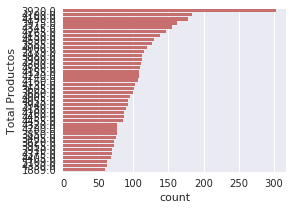

In [19]:
col = 'Total Productos'
print(cot_mod[col].dtype)
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 67
No nulos 16525
Unicos 6070
Malformed values:  0
3
['1111', '4444', '0']
3
['1111', '4444', '0']
6070 ['nrojasu@icloud.com', 'cese2006@gmail.com', 'yenipbm@gmail.com', 'carpymetal@gmail.com', 'zarah.loboslillo@gmail.com', 'helena.villouta@gmail.com', 'cstamaria@hotmail.com', 'leslieespinoza01@gmail.com', 'consuelos35@gmail.com', 'fabiolamorenopineda@gmail.com', 'lulapolidori@gmail.com / galcazar@molicop.cl', 'carlos.cofre.vega@arauco.cl', 'alemarcas@gmail.com', 'cesaransovi@hotmail.com', 'jmorenoo2@live.cl ', 'guido.silva.r@gmail.com', 'aguileralopezpa@gmail.com', 'robinson.reyes.o@gmail.com', 'macvegasmx@gmail.com', 'hectorgajardofigueroa@gmail.com', 'kotmer@gmail.com', 'rvejar@minvu.cl', 'dazabecerra@gmail.com', 'enzo.lizamar@gmail.com', 'anamaria.imprecero@gmail.com', 'pespinos@arauco.cl', 'gabriel.gonzalez.mj@gmail.com', 'asanchez@aitue.cl', 'crvejar@gmail.com', 'agattinik@gmail.com', 'cmerino@ecoingen.com', 'pia.gutierrez@hotmail.com', 'ppincheira.l@gmail.com', 'alej.arria

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


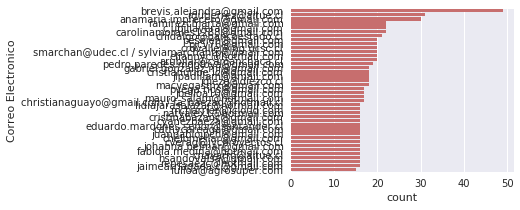

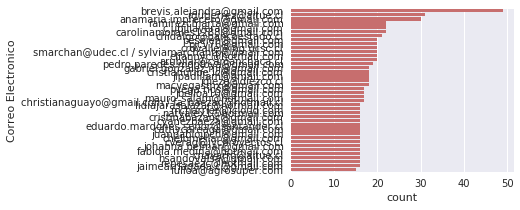

In [22]:
col = 'Correo Electronico'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 5, cot_mod)
ver_atributo_categorico(cot_mod, col, log=False, limit = True, lim=40)
cot_mod[col].replace(['eeee', 'eeee', 'xxx', 'eeee', 'xx', 'xx', 'xx'], np.nan, inplace=True)
view_malformations(col, 5, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 42
No nulos 16550
Unicos 1531
Malformed values:  0
0
[]
1531 ['rojas', 'sepulveda', 'burgos', 'torres', 'fuentes', 'lobos', 'villouta', 'santa maria', 'espinoza', 'salazar', 'moreno', 'polidori', 'cofre', 'mardones', 'soto', 'paredes', 'silva', 'aguilera', 'reyes', 'ambiado', 'gajardo', 'merino', 'vejar', 'daza', 'lizama', 'valdes', 'espinosa', 'gonzalez', 'sanchez', 'gattini', 'gutierrez', 'pincheira', 'arriagada', 'garces', 'esparza', 'zamorano', 'hidalgo', 'penailillo', 'cea', 'riffo', 'gaete', 'jorquera', 'medina', 'alarcon', 'urzua', 'polanco', 'osorio', 'contreras', 'rebolledo', 'lopez', 'garcia', 'sagredo', 'uribe', 'garrido', 'ordenes', 'escobar', 'cifuentes', 'scarlazetta', 'inzunza', 'sanhueza', 'courdurier', 'cadenas', 'aranguiz', 'moraga', 'garate', 'belmar', 'gomez', 'pache', 'zagal', 'bobadilla', 'figueroa', 'vega', 'barriga', 'sandoval', 'alcerreca', 'friedl', 'arroqui', nan, 'diaz', 'guzman', 'collao', 'castro', 'donoso', 'chappuzeau', 'victoriano', 'castillo', 'q

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


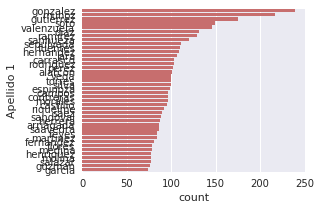

In [23]:
col = 'Apellido 1'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 2, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 44
No nulos 16548
Unicos 339
Malformed values:  14368
339 [0.0, 40.1, 50.13, 174.55, 205.5, 205.55, 152.9, 268.0, 1467.97, 1293.18, 1436.4, 498.0, 2004.7, 632.0, 336.0, 293.0, nan, 300.0, 93.78, 153.08, 171.66, 102.8, 103.82, 55.72, 106.44, 75.15, 83.91, 79.6, 76.5, 75.4, 84.3, 76.4, 72.2, 80.1, 77.7, 76.8, 76.9, 86.0, 76.6, 85.3, 69.9, 77.1, 76.7, 72.5, 85.8, 72.3, 69.6, 83.3, 83.8, 84.7, 75.5, 82.8, 69.7, 75.0, 42.35, 41.2, 37.7, 34.85, 39.8, 38.4, 34.8, 83.0, 75.7, 84.0, 88.4, 80.0, 78.5, 74.4, 2.0, 87.9, 90.8, 85.5, 86.6, 100.0, 79.1, 86.8, 71.7, 76.2, 71.3, 71.8, 91.8, 90.0, 72.1, 87.3, 84.9, 86.4, 95.3, 70.3, 71.9, 72.6, 70.2, 70.1, 72.0, 45.4, 35.9, 74.6, 35.95, 82.5, 85.1, 74.7, 86.3, 84.8, 112.05, 107.55, 142.95, 123.75, 108.0, 108.15, 136.2, 132.6, 129.6, 129.45, 127.65, 137.7, 107.7, 106.95, 107.85, 111.6, 129.9, 131.7, 127.95, 128.1, 82.0, 41.0, 42.0, 81.0, 61.0, 40.0, 56.0, 6.0, 7.0, 132.15, 30.0, 20.0, 229.0, 219.0, 205.0, 196.0, 213.25, 214.75, 207.5, 217.75, 209.5

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


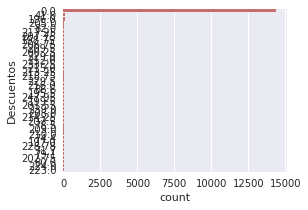

In [24]:
col = 'Descuentos'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 44
No nulos 16548
Unicos 2539
Malformed values:  1
2539 [2121.0, 4176.0, 3522.0, 4156.0, 3235.0, 4312.0, 3291.0, 3681.0, 2905.0, 3699.0, 430.0, 660.0, 780.0, 390.0, 720.0, 330.0, 8554.0, 2123.0, 2183.0, 3787.0, 1793.0, 3693.0, 3369.0, 3790.0, 3683.0, 3192.0, 1703.0, 4028.0, 3988.0, 4334.0, 3295.0, 3759.0, 3900.0, 4290.0, 2496.0, 7263.0, 3613.0, 2400.0, 2277.0, 2046.0, 7695.0, 3358.0, 3582.0, 3356.0, 3120.0, 3255.0, 1820.0, 3928.0, 2093.0, 3405.0, 2860.0, 2957.0, 1947.0, 4180.0, 3457.0, 2966.0, 3330.0, 2141.0, 3948.0, 2170.0, 3468.0, 3957.0, 4098.0, 4400.0, 4570.0, 3922.0, 2210.0, 2337.0, 3753.0, 4379.0, 4378.0, 4680.0, 4790.0, 3598.0, 3743.0, 3360.0, 3400.0, 3670.0, 2349.0, 2389.0, 3807.0, 3971.0, 4101.0, 4399.0, 2297.0, 3847.0, 3962.0, 3641.0, 3837.0, 4107.0, 4457.0, 2730.0, 1900.0, 3834.0, 3992.0, 3382.0, 4406.0, 4796.0, 3558.0, 3342.0, 2005.0, 2992.0, 2314.9, 2304.87, 2366.0, 2250.0, 460.0, 3155.0, 2131.0, 3178.0, 350.0, 3437.0, 3888.0, 3495.0, 4277.0, 3001.0, 3351.0, 3887.0, 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


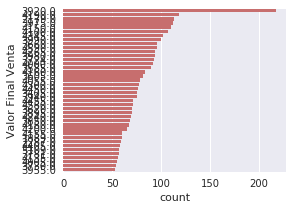

In [25]:
col = 'Valor Final Venta'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 83
No nulos 16509
Unicos 3534
Malformed values:  0
11435
['43', '2', '5', '12', '11', '13', '15', '19', '7', '7', '20', '25', '27', '41', '40', '35', '4', '9', '12', '14', '24', '28', '38', '42', '43', '44', '1', '1', '2', '2', '44', '7', '12', '5.5', '1.1', '1.1', '5.5', '39', '24', '39', '20.2', '9.9', '7.7', '4.4', '39', '40.4', '44', '43', '42', '16', '18', '1', '8', '2', '29', '26', '17', '21', '32', '26', '31', '1', '33', '31', '18', '15', '1', '8', '8', '32', '32', '21', '32', '21', '17', '2', '32', '15', '32', '21', '15', '33', '21', '21', '17', '3', '32', '32', '21', '3', '2', '3', '21', '3', '34', '1', '1', '3', '16', '16', '3', '21', '18', '21', '32', '32', '21', '16', '2', '15', '18', '23', '18', '18', '33', '18', '1', '2', '1', '8', '33', '15', '1', '2', '18', '1', '34', '1', '3', '21', '11', '39', '37', '6', '1', '1', '6', '17', '8', '15', '38', '8', '7', '1', '8', '8', '25', '7', '7.17', '6', '50', '8', '1', '1', '34', '38', '7', '10', '36', '36', '46', '18', '18',

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


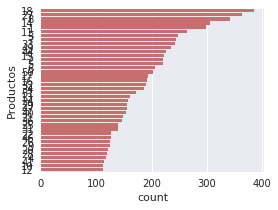

In [26]:
col = 'Productos'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 5, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 172
No nulos 16420
Unicos 35
Malformed values:  13857
35 [0.0, 1.0, 5.0, 2.0, 29.0, 6.0, 3.0, 37.0, 7.0, 13.0, nan, 9.0, 11.0, 10.0, 15.0, 4.0, 20.0, 22.0, 12.0, 8.0, 40.0, 31.0, 18.0, 17.0, 32.0, 16.0, 27.0, 14.0, 24.0, 23.0, 33.0, 19.0, 28.0, 21.0, 30.0, 100.0]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


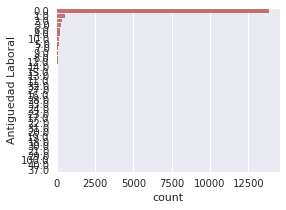

In [27]:
col = 'Antiguedad Laboral'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 1997
No nulos 14595
Unicos 1360
Malformed values:  48
334
['l', 'l', 'c', 'c', 'c', 'l', 'a', 's.', 's.', 's.', 'i.', 'i.', 'i.', 'r.', 'r.', 'g', 'g', 'l.', 'p.', 't.', 't.', 't.', 'l', 'k', 'k', 'k', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'a.', 'x', 'x', 'x', 'm', 'roa', 'x', 'i', 'i', 's', '+', 'cea', 'o', '+', '+', 'g', 'r.', 'r.', 'p', 'g', 'cid', 'cid', 'cid', '0', '0', 'w', 'a', 'r', 's', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'c', 'e', 'roa', 'roa', 'roa', 'xxx', 'g', 'a', 'cox', 'cox', 'cox', 'cid', 'cid', 'roa', 'roa', 'cid', 'cid', 'cea', 'cea', 'cid', 'cid', 'cid', 'cid', 'r', 'roa', 'coa', 'coa', 'cid', 'cid', 'cid', 'cid', 'cid', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'cea', 'cea', 'roa', 'roa', 'roa', 'nn', 'nn', 'nn', 'nn', 'roa', 'e', 'g', 't', 'p', 'roa', 'paz', 'cid', 'roa', 'a', 's', 's', 'o.', 'o.', 'o.', 'cea', 'cea', 'cea', 'cea', 'r', 'f', '

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


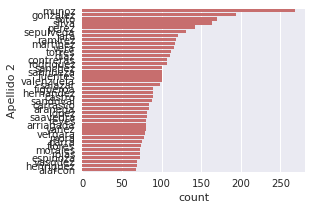

In [29]:
col = 'Apellido 2'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 532
No nulos 16060
Unicos 31
Malformed values:  0
31 ['paseo', 'recontacto', 'web aitue', 'cliente aitue de otro proyecto', 'portal inmobiliario', 'eventos', 'enlace bio bio', 'boulevard inmobiliario', 'cliente aitue del mismo proyecto', 'google', 'enlace inmobiliario', 'tercero', 'el inmobiliario', 'letreros', 'base finco 2018', 'mailing', 'g-leads', 'base finco 2016', 'base finco 2017', 'volantes', 'diarios', 'revistas', nan, 'facebook', 'base finco 2011', 'base finco 2013', 'base finco 2012', 'tv', 'radio', 'base finco 2014', 'base finco 2015', 'sms']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


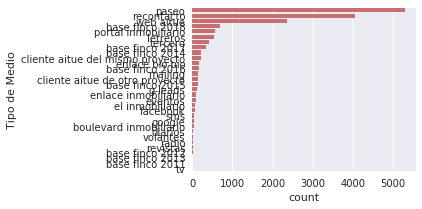

In [30]:
col = 'Tipo de Medio'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 2147
No nulos 14445
Unicos 2
Malformed values:  0
2 ['femenino', 'masculino', nan]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


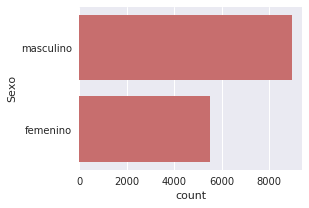

In [31]:
col = 'Sexo'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 5650
No nulos 10942
Unicos 6
Malformed values:  0
6 ['41-50', '31-40', nan, '20-30', '51-60', '61+', '15-19']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


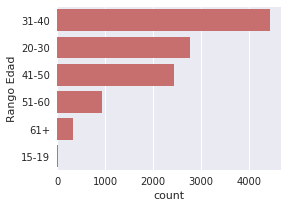

In [32]:
col = 'Rango Edad'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 2027
No nulos 14565
Unicos 2
Malformed values:  0
2 ['si', 'no', nan]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


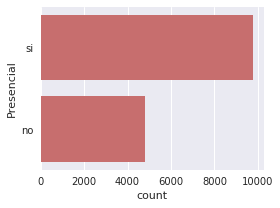

In [33]:
col = 'Presencial'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 7114
No nulos 9478
Unicos 8
Malformed values:  0
8 ['casado(a)', nan, 'viudo(a)', 'soltero(a)', 'casado', 'divorciado(a)', 'separado(a)', 'soltero', 'conviviente civil']
6 ['casado(a)', nan, 'viudo(a)', 'soltero(a)', 'divorciado(a)', 'separado(a)', 'conviviente civil']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


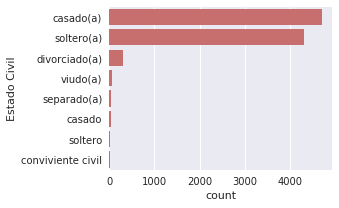

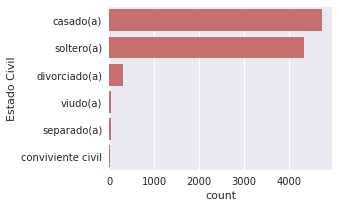

In [34]:
col = 'Estado Civil'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)
cot_mod[col].replace({'casado':'casado(a)','soltero':'soltero(a)'}, inplace=True)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 2350
No nulos 14242
Unicos 6
Malformed values:  0
0
[]
6 ['tecnico', 'empleado', 'profesional', 'independiente (no profesional)', nan, 'duena de casa', 'estudiante']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


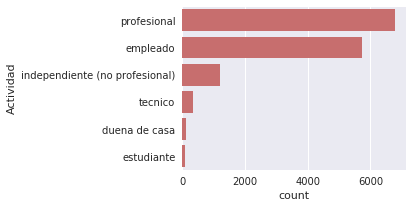

In [35]:
col = 'Actividad'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 3,cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 3310
No nulos 13282
Unicos 2
Malformed values:  0
0
[]
2 ['no', 'si', nan]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


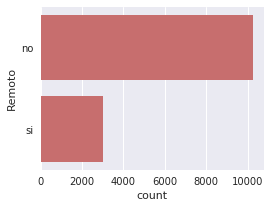

In [36]:
col = 'Remoto'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 1,cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 9676
No nulos 6916
Unicos 8
Malformed values:  0
8 ['3', nan, '4', '1', '5', '2', '8', '6', '7']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


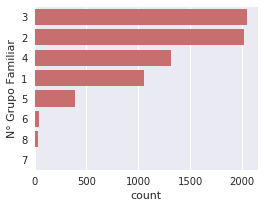

In [37]:
col = 'N° Grupo Familiar'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
# view_malformations(col, 1)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)
# cot_mod[col].replace({'sin informacion':np.nan}, inplace=True)
# ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 9226
No nulos 7366
Unicos 129
Malformed values:  0
0
[]
129 [nan, 'empresario', 'constructor civil', 'traductor e interprete', 'matrona', 'odontologo', 'profesor', 'ingenieria en biotecnologia', 'otro', 'ingeniero electrico', 'tecnico en construccion', 'fonoaudiologo', 'diseno industrial', 'mecanico industrial', 'empleado publico', 'enfermeria', 'ingeniero en administracion', 'contador auditor', 'ingeniero comercial', 'ingeniero en construccion', 'ingeniero', 'empleado', 'agronomo', 'prevencionista de riesgos', 'ingeniero civil quimica', 'administrador', 'ingeniero civil industrial', 'nutricion y dietetica', 'tecnologo medico', 'abogado', 'medico', 'educadora de parvulos', 'administrador publico', 'periodista', 'ingeniero de ejecucion', 'psicologo', 'arquitecto', 'ingeniero civil electronico', 'ingeniero en prevencion de riesgo', 'ingeniero civil electrico', 'vendedor', 'pastor', 'administracion de empresas', 'administrativo', 'docente', 'ingeniero agronomo', 'trabajo social', 'i

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


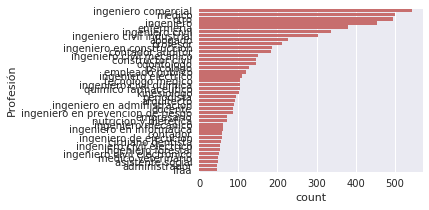

In [38]:
col = 'Profesión'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4,cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 11386
No nulos 5206
Unicos 1273
Malformed values:  0
0
[]
1273 ['santo tomas beket 440, casa 33, lomas san sebastian', nan, 'calle 1 590, lorenzo arenas 590', 'pasaje la espiga, quilamapu', 'marina de chile 3098', 'avenida san sebastian 746 condominio don esteban casa 05, lomas de san sebastian. 746 depto 05', 'garcia hurtado de mendoza 525 depto 5', 'camino al venado 585', 'laguna lo galindo 813 villa ensenada 813', 'j. valdivieso 296 depto 34 296 depto 34', 'los lirios, pasaje 37 360', 'avenida las terrazas 1546 depto terrazas las lomas', 'pasaje san celso 9388', 'alfredo valenzuela 388, villa acero 388', 'desiderio garcia higueras 756', 'condominio juan antonio varas 1664 concepcion 1664', 'quilacoya 9227, villa antillanca, hualpen 9227', 'lorenzo arenas mencia de los nidos 195', 'carmen 110 depto 216', 'la quinta 956', 'moises amaral 125', 'calle santiago, villa santiago. 740', 'domingo ortiz de rozas 1470, terrazas las lomas', 'cochrane 1384', 'ramon carrasco 231', 'galbarin

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


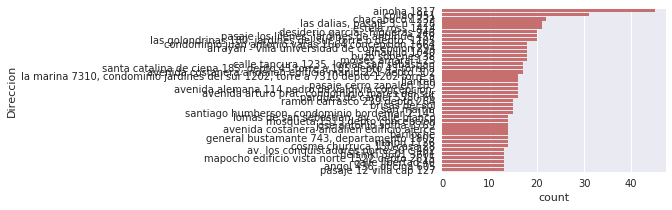

In [39]:
col = 'Direccion'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4,cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 11749
No nulos 4843
Unicos 7
Malformed values:  0
0
[]
7 [nan, 'chilena', 'venezolana', 'colombiana', 'alemana', 'extranjera', 'boliviana', 'china']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


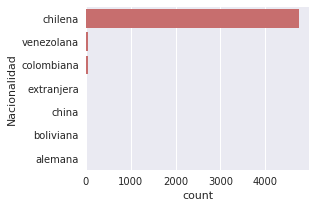

In [40]:
col = 'Nacionalidad'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4,cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 12701
No nulos 3891
Unicos 840
Malformed values:  0
0
[]
840 [nan, '1950-07-25 00:00:00.000', '1975-04-19 00:00:00.000', '2016-08-18 00:00:00.000', '1983-11-07 00:00:00.000', '1967-01-20 00:00:00.000', '1990-03-12 00:00:00.000', '1965-02-07 00:00:00.000', '1988-07-31 00:00:00.000', '1979-01-15 00:00:00.000', '1954-12-28 00:00:00.000', '2017-08-13 00:00:00.000', '1986-03-25 00:00:00.000', '1973-04-23 00:00:00.000', '1985-04-11 00:00:00.000', '1985-07-09 00:00:00.000', '1988-08-04 00:00:00.000', '1953-05-25 00:00:00.000', '1985-10-14 00:00:00.000', '1990-08-03 00:00:00.000', '1947-08-16 00:00:00.000', '1984-07-31 00:00:00.000', '1981-07-28 00:00:00.000', '1987-11-03 00:00:00.000', '1978-02-24 00:00:00.000', '1952-05-30 00:00:00.000', '1981-08-22 00:00:00.000', '1985-12-31 00:00:00.000', '1967-03-02 00:00:00.000', '1980-04-02 00:00:00.000', '1984-02-18 00:00:00.000', '1963-04-08 00:00:00.000', '1988-10-29 00:00:00.000', '1980-11-14 00:00:00.000', '1966-02-24 00:00:00.000', '1971-07-

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


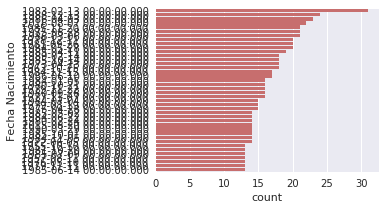

In [41]:
col = 'Fecha Nacimiento'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4,cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 12942
No nulos 3650
Unicos 2
Malformed values:  0
0
[]
2 [nan, 'dependiente', 'independiente']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


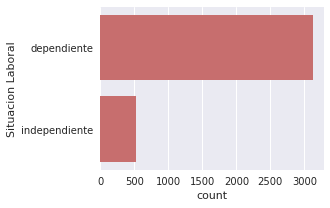

In [42]:
col = 'Situacion Laboral'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4,cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 13858
No nulos 2734
Unicos 461
Malformed values:  71
117
['a', 'mop', '1', '1', '1', '1', '1', 'lfi', 'acs', 'pdi', 'a', 'x', 'm', 'acs', 'x', 'x', 'cmr', 'x', 'x', 'x', 'ccu', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'no', 'k', 'k', '1', 'pdi', 'pdi', 'dss', 'c', 'dss', 'm', 'abb', 'abb', 'abb', 'abb', 'lfi', 'a', 'a', 'a', 'c', ',', ',', ',', ',', ',', 'aaa', 'aaa', 'aaa', 'aaa', 'aaa', 'aaa', 'aaa', '11', '11', 'aa', 'aa', 'a', 'pdi', 'pdi', 'rrr', 'c', 'c', 'a', 'a', 'pdi', 'pdi', 'pdi', 'a', 'a', 'a', 'a', 'www', 'pdi', 'pdi', 'pdi', 'coz', '0', '0', 'coz', 'efe', 'coz', 'coz', 'coz', 'bci', 'bci', 'bci', 'coz', 'coz', 'coz', '0', '0', '0', 'x', 'x', 'pdi', 'pdi', 'pdi', 'pdi', 'pdi', 'pdi', 'mop', 'mop', 'mop', 'mop', 'a', 'a', 'mop', 'vtr', 'vtr']
461 [nan, 'a', 'norteamericano / uss / udd', 'cesfam lautaro caceres', 'bioforest s.a.', 'dgac', 'acciona agua', 'constructora aitue ', 'arrigoni ing.y const. s.a', 'soc. transportes maritimo service ltda', 'traumatologico

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


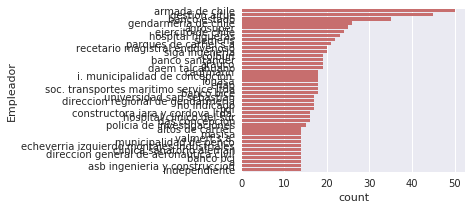

In [43]:
col = 'Empleador'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4,cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 14005
No nulos 2587
Unicos 378
Malformed values:  82
101
['a', '1', '1', '1', 'c', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'a', 'x', 'bpm', 'bpm', 'x', 'x', 'ccc', 'x', 'x', 'x', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'nn', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'bpm', 'k', 'k', '1', 'c', 'c', 'c', 'www', 'aaa', 'aaa', 'aaa', 'aaa', 'aaa', 'aaa', 'aaa', 'doa', 'doa', 'aa', 'aa', 'fff', 'c', 'c', 'fff', 'fff', 'fff', 'www', 'www', 'www', 'www', 'eee', 'bpm', 'bpm', 'bpm', '0', '0', 'bpm', 'bpm', 'bpm', '0', '0', '0', 'x', 'x', 'pdi', 'pdi', 'pdi', 'pdi', 'pdi', 'pdi']
378 [nan, 'a', 'profesora', 'matrona', 'odontologo', 'biotecnologo', 'metereologo', 'ingeniero de mantencion', 'administrador de obras', 'vendedor tecnico', 'enfermeria', 'consultor senior 2', 'jefe de costos y presupuestos', 'jefe area de repuestos', 'supervisor inmobiliario.', 'jubilada', 'jejfa de local

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


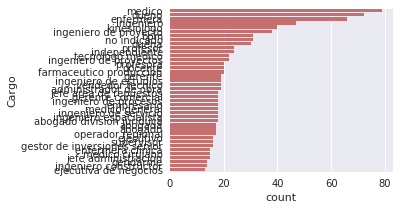

In [44]:
col = 'Cargo'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4,cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 14894
No nulos 1698
Unicos 588
Malformed values:  1
22
['0', '0', '0', '|', '|', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', 'x', '0']
588 ['998792344', nan, '76374699', '940959066 nuevo telefono', '3172725', '993201131', '964328618', '56981385833/', '996412302', '2973278', '+56 41 2502483', '82995455', '41-3182321', '931214946', '974783582', '92206440', '+56 41 3177729', '56987381297', '98219775', '996730548', '56963724415/', '976619480', '967759098', '41 2134819', '+56 9 78658970 ', '990666215', '41-3224577', '412131702', '963063206', '95121418', '2906890', '56987324844', '999769734', '962035471', '87683514', '2-22264648', '2226284', '432411113', '41-2218810', '91656600', '56 41 2242', '72135157', '992590325', '982297510', '2105100', '2463311', '2620100', '0', '2218941', '412463308', '.981595808', '41-2796205', '966779440', '998731229', '977590995', '973993607', '984299862', '988995143', '992220684', '968396348', '979580756', '998713064', '9623885

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


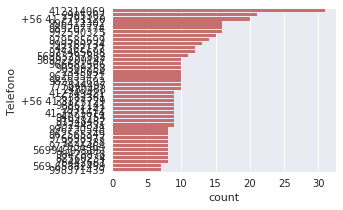

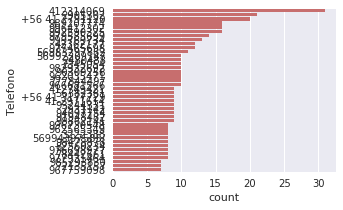

In [45]:
col = 'Telefono'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)
cot_mod[col].replace(
    ['0', '0', '0', '|', '|', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', 'x', '0'], 
    np.nan, 
    inplace=True)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 16557
No nulos 35
Unicos 21
Malformed values:  0
0
[]
21 [nan, 'sociedad de transportes terrestres bobadilla ltda.', 'importadora y comercializadora trebolmax ltda', 'inversiones', 'windows pvc', 'comercializadora de aluminios y vidrios', 'inmobiliaria e inversiones carcon spa', 'inversiones los colonos ltda', 'servicios emca spa', 'servicios medicos bustos binimelis y cia ltda', 'inmobiliaria', 'ases inmob maria garcia', 'alister ingenieria y construccion ltda', 'patricio lagos', 'forestal y agricola rio larqui', 'imv cia ltda.', 'suizcorp', 'comercial milu spa', 'inversiones ebisu spa', 'inversiones santa geradine ltda', 'hermanos salgado pedraza', 'rocha y pena ltda']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


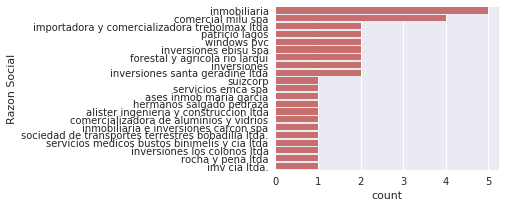

In [46]:
col = 'Razon Social'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

Nulos 16559
No nulos 33
Unicos 20
Malformed values:  0
0
[]
20 [nan, 'transporte de carga por carretera', 'importadora y comercializadora', 'inversiones', 'seguros', 'comercializadora de aluminios y vidrios', 'inmobiliaria', 'servicios', 'servicios medicos', 'inmobiliario', 'ingenieria', 'imv cia ltda.', 'inmobiliaria divesa ltda.', 'comercializadora', 'obras civiles', 'constructora', 'comercializadora utiles domesticos', 'sociedad de inversion', 'sociedad de inversiones', 'industrial', 'trasporte']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


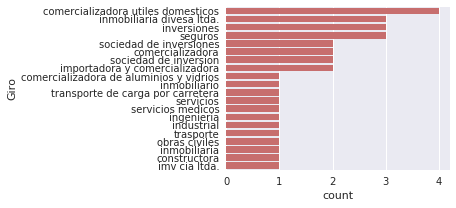

In [47]:
col = 'Giro'
nulos_n_unicos(col, cot_mod)
malformed_values(col, cot_mod)
view_malformations(col, 4, cot_mod)
ver_atributo_categorico(cot_mod, col, log=True, limit = True, lim=40)

In [48]:
#NEGOCIOS

# 1 Negocio y Venta

In [50]:
cot_all = pd.read_csv("..\\..\\Datos\\initial\\cotizaciones_all.csv", index_col=[0], encoding = "ISO-8859-1")
neg_all = pd.read_csv("..\\..\\Datos\\initial\\negocios_all.csv", index_col=[0], encoding = "ISO-8859-1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
# Venta Sesgadores
personas_ventas = dict()
total_ventas = 0
search = ['Escriturado', 'Entregado']

for group, frame in neg_all.groupby('RUT'):
    for id_cot in frame['Estado'].values:
        if search[0] == id_cot or search[1] == id_cot:
            total_ventas += 1
            if group not in personas_ventas.keys():
                personas_ventas[group] = 1
            else:
                personas_ventas[group] += 1
#             print(group, id_cot)

print('filas negocios', neg_all.shape[0])
print('filas ventas', total_ventas)
print('personas que hicieron negocio', neg_all.RUT.nunique())
print('personas que compraron',len(personas_ventas))

filas negocios 2347
filas ventas 291
personas que hicieron negocio 1103
personas que compraron 288


In [52]:
# ruts de los clientes en negocio
neg_ids = neg_all['ID Cotizacion'].unique().tolist()
# print(neg_ids)
# venta_ids = neg_all[neg_all['ID Cotizacion'].isin(personas_ventas)]

# print(len(venta_ids))

In [53]:
cot_mod['Negocio'] = cot_mod['ID'].isin(neg_ids)
print(cot_mod[cot_mod['Negocio'] == True].shape[0])

cot_mod['Venta'] = cot_mod['ID'].isin(personas_ventas)
print(cot_mod[cot_mod.Venta == True].shape[0])

2336
0


In [54]:
# negocio_true = cot_mod[cot_mod['Negocio'] == True]['ID'].tolist()
# negocio_notin_cotizacion = [x if x in negocio_true else x for x in neg_ids]
# negocio_notin_cotizacion
c = cot_mod[cot_mod.Negocio == True]['ID'].tolist()

for i in neg_ids:
    if i not in c:
        print(i)

134848
60373
79802
136425


In [55]:
# cot_mod.reset_index(inplace=True)
# cot_mod.head()

# 2 RUT

## 2.1 Rut
Arreglar Ruts, luego validarlos para aplicar data crawling en rutificador.
Si el rut esta mal escrito por ende no es valido, se prosigue a buscar el rut por el nombre y arreglar el rut.
Todo esto con el find de obtener el genero, direccion, latiyud y longitud del cotizante

### 2.1.1 Funciones
Funciones para tratar los ruts

In [56]:
# #Eliminar indice 1704 y arreglar rut max boris
# print('Ruts que no hicieron negocios y no son validos')
# p_noneg_invalidrut = cot_mod[(cot_mod['Valid Rut'] == False) & (cot_mod['Negocio'] == False)][['Nombre','RUT','Negocio','Valid Rut','Clean Rut']]
# len(p_noneg_invalidrut)

In [57]:
import chile_rut
import re

def format_rut(x):
    rut = x.split('-')
    l_s = list(rut[0])
    r_l = l_s[::-1]
    new = []
    i = 0
    new.append(rut[1])
    new.append('-')
    for c in r_l:
        if i==3:
            new.append('.')
            i = 0
        new.append(c)
        i +=1
    rut = ''.join(new[::-1])
    return rut

def val_rut(x):
    x = str(x)
    if len(x) == 0:
        return False
    x = re.sub('[.|!@#$]', '', x)
    
    if len(x.split('-')) >= 2:
        return chile_rut.validate_rut(x)
    else:
        x = x[:-1] + '-' + x[-1]
        return chile_rut.validate_rut(x)

def clean_rut(x):
    x = str(x)
    if len(x) == 0:
        return False
    x = re.sub('[.|!@#$]', '', x)
    
    if len(x.split('-')) >= 2:
        return x
    else:
        x = x[:-1] + '-' + x[-1]
        return x

cot_mod['Real Rut'] = list(cot_mod['RUT'].tolist())
cot_mod['Clean Rut'] = [clean_rut(x) for x in cot_mod['RUT'].values]
cot_mod['Valid Rut'] = [val_rut(x) for x in cot_mod['Clean Rut'].values]

neg_mod['Real Rut'] = list(neg_mod['RUT'].tolist())
neg_mod['Clean Rut'] = [clean_rut(x) for x in neg_mod['RUT'].values]
neg_mod['Valid Rut'] = [val_rut(x) for x in neg_mod['Clean Rut'].values]


In [59]:
valores_mal_formados = dict()
valores_mal_formados['neg'] = dict()
valores_mal_formados['cot'] = dict()

### 2.1.1 Insights
Revision de los ruts, mal formaciones, ruts malos que tienen negocios, etc

In [60]:
mask = neg_mod['Valid Rut'] == False
rut_neg_novalid = neg_mod[mask]
print(rut_neg_novalid['ID'].count())
valores_mal_formados['neg']['rut'] = rut_neg_novalid['ID'].count() 

mask = cot_mod['Valid Rut'] == False
rut_cot_novalid = cot_mod[mask]
print(rut_cot_novalid['ID'].count())
valores_mal_formados['cot']['rut'] = rut_cot_novalid['ID'].count()

3
69


In [61]:
# cot_mod.at[10507, 'Clon Rut'] = '14.030.274-0'
# cot_mod.at[10621, 'Clon Rut'] = '14.030.274-0'
# cot_mod.drop([15379], axis=0, inplace=True)

# cot_mod.at[425,'Clon Rut'] = '10.117.605-3'
# cot_mod.at[827,'Clon Rut'] = '4.379.605-4'
# cot_mod.at[828,'Clon Rut'] = '4.379.605-4'
# cot_mod.at[870,'Clon Rut'] = '12.844.757-1'
# cot_mod.at[871,'Clon Rut'] = '12.844.757-1'
# cot_mod.at[872,'Clon Rut'] = '12.844.757-1'
# cot_mod.at[890,'Clon Rut'] = '10.658.228-9'
# cot_mod.at[891,'Clon Rut'] = '10.658.228-9'
# cot_mod.at[892,'Clon Rut'] = '10.658.228-9'
# cot_mod.at[1017,'Clon Rut'] = '15.777.609-6'
# cot_mod.at[1038,'Clon Rut'] = '12.844.757-1'
# cot_mod.at[1039,'Clon Rut'] = '12.844.757-1'
# cot_mod.at[1157,'Clon Rut'] = '15.961.611-8'
# cot_mod.at[1158,'Clon Rut'] = '15.961.611-8'
# cot_mod.at[1159,'Clon Rut'] = '15.961.611-8'
# cot_mod.at[2537,'Clon Rut'] = '17.321.915-6'
# cot_mod.at[3150,'Clon Rut'] = '13.941.422-5'
# cot_mod.at[5853,'Clon Rut'] = '12.207.750-0'
# cot_mod.at[5855,'Clon Rut'] = '13.508.090-K'
# cot_mod.at[5865,'Clon Rut'] = '12.207.750-0'
# cot_mod.at[9066,'Clon Rut'] = '13.941.422-5'
# cot_mod.at[9067,'Clon Rut'] = '13.941.422-5'
# cot_mod.at[9068,'Clon Rut'] = '13.941.422-5'
# cot_mod.at[10817,'Clon Rut'] = '14.354.185-1'
# cot_mod.at[11802,'Clon Rut'] = '13.994.909-9'
# cot_mod.at[11835,'Clon Rut'] = '16.620.489-5'
# cot_mod.at[11838,'Clon Rut'] = '8.272.869-4'
# cot_mod.at[11839,'Clon Rut'] = '8.272.869-4'
# cot_mod.at[11840,'Clon Rut'] = '8.272.869-4'
# cot_mod.at[12060,'Clon Rut'] = '6.180.535-4'
# cot_mod.at[12154,'Clon Rut'] = '8.639.046-9'
# cot_mod.at[12181,'Clon Rut'] = '13.413.569-7'
# cot_mod.at[12216,'Clon Rut'] = '9.559.524-3'
# cot_mod.at[12691,'Clon Rut'] = '17.321.289-5'
# cot_mod.at[12819,'Clon Rut'] = '8.495.983-9'
# cot_mod.at[13150,'Clon Rut'] = '16.036.374-6'
# cot_mod.at[14026,'Clon Rut'] = '15.780.460-K'
# cot_mod.at[14027,'Clon Rut'] = '15.780.460-K'
# cot_mod.at[15255,'Clon Rut'] = '17.896.434-8'
# cot_mod.at[15256,'Clon Rut'] = '17.896.434-8'
# cot_mod.at[15412,'Clon Rut'] = '13.133.359-5'
# cot_mod.at[15414,'Clon Rut'] = '14.359.960-4'
# cot_mod.at[15563,'Clon Rut'] = '15.854.369-9'
# cot_mod.at[15564,'Clon Rut'] = '15.854.369-9'
# cot_mod.at[15646,'Clon Rut'] = '15.999.180-6'
# cot_mod.at[15647,'Clon Rut'] = '15.999.180-6'
# cot_mod.at[15671,'Clon Rut'] = '17.206.422-1'
# cot_mod.at[15782,'Clon Rut'] = '14.060.162-4'
# cot_mod.at[15881,'Clon Rut'] = '17.540.251-9'


In [62]:
# cot_mod['Clean Rut'] = [clean_rut(x) for x in cot_mod['Clon Rut'].values]
# cot_mod['Valid Rut'] = [val_rut(x) for x in cot_mod['Clean Rut'].values]

In [63]:
print('Ruts en Cotizacion que hicieron negocios pero no son validos')
p_neg_novalid_noclean = cot_mod[(cot_mod['Valid Rut'] == False)][['Negocio','Sexo','Nombre Completo','RUT','Comuna','Valid Rut', 'Direccion']]
print(p_neg_novalid_noclean.shape[0])
p_neg_novalid_noclean.reset_index().head(100)

Ruts en Cotizacion que hicieron negocios pero no son validos
69


,index,Negocio,Sexo,Nombre Completo,RUT,Comuna,Valid Rut,Direccion
0,425,False,femenino,nancy de la rosa castillo fuentes,10117065-3,talcahuano,False,bacilio urrutia pasaje 1
1,331,False,NaN,sonia figueroa yasin,4379650-4,concepcion,False,NaN
2,332,False,NaN,sonia figueroa yasin,4379650-4,concepcion,False,NaN
3,374,False,femenino,morin hernandez .,12844757-k,concepcion,False,NaN
4,375,False,femenino,morin hernandez .,12844757-k,concepcion,False,NaN
5,376,False,femenino,morin hernandez .,12844757-k,concepcion,False,NaN
6,394,False,femenino,marta jana .,10658228-6,concepcion,False,NaN
7,395,False,femenino,marta jana .,10658228-6,concepcion,False,NaN
8,396,False,femenino,marta jana .,10658228-6,concepcion,False,NaN
9,521,False,femenino,gloria garrido avendano,15779609-6,concepcion,False,avenida san andres 507


In [64]:
print('Ruts en Negocio que no son validos')
p_neg_novalid_noclean = neg_mod[(neg_mod['Valid Rut'] == False)][['Sexo','Nombre Completo','RUT','Comuna','Valid Rut', 'Direccion']]
print(p_neg_novalid_noclean.shape[0])
p_neg_novalid_noclean.reset_index().head(25)

Ruts en Negocio que no son validos
3


,index,Sexo,Nombre Completo,RUT,Comuna,Valid Rut,Direccion
0,1220,Masculino,max boris chandia gonzalez,14030274-6,Hualpén,False,pje cartagena 827
1,1266,Masculino,max boris chandia gonzalez,14030274-6,Hualpén,False,pje cartagena 827
2,143,Masculino,Error Cliente,15516786-8,Concepción,False,SERRANO 177 Depto 501


In [65]:
cot_mod['Clean Rut'] = [clean_rut(x) for x in cot_mod['RUT'].values]
cot_mod['Valid Rut'] = [val_rut(x) for x in cot_mod['RUT'].values]
# cot_mod['New Valid Rut'] = [val_rut(x) for x in cot_mod['Clean Rut'].values]
cot_mod['Format Rut'] = [format_rut(x) for x in cot_mod['Clean Rut'].values]

In [66]:
cot_mod['Format Rut']

0       14.273.551-2
1       13.309.954-9
2       14.583.354-k
3        7.188.659-k
4       13.377.606-0
5       16.863.328-9
6       17.046.821-k
7       17.046.821-k
8       13.951.239-1
9       12.920.930-5
10      12.920.930-5
11      10.076.241-2
12      15.625.979-9
13       9.879.501-4
14      17.346.494-0
15      10.065.290-0
16      16.763.770-1
17      13.842.771-4
18       6.521.908-5
19      16.282.675-1
20      16.240.108-4
21      12.524.132-8
22      16.863.328-9
23      19.270.890-7
24      15.912.017-1
25      12.523.213-2
26      12.523.213-2
27      15.912.197-6
28      17.041.530-2
29       8.399.766-4
            ...     
2887    17.758.410-k
2888    14.423.710-2
2889    16.896.206-1
2890    15.186.475-9
2891    16.763.798-1
2892    10.028.666-1
2893    10.028.666-1
2894    10.028.666-1
2895    17.853.463-7
2896    10.619.053-4
2897    10.619.053-4
2898    17.045.141-4
2899    14.391.486-0
2900    15.173.211-9
2901     9.289.690-0
2902    12.732.636-3
2903    12.73

In [67]:
valid_ruts = cot_mod[cot_mod['Valid Rut']== True]['Clean Rut']
valid_ruts.to_csv("..\\..\\ruts_validos_scrap.csv")

In [68]:
mask = neg_mod['Valid Rut'] == False
rut_neg_novalid = neg_mod[mask]
print(rut_neg_novalid['ID'].count())

mask = cot_mod['Valid Rut'] == False
rut_cot_novalid = cot_mod[mask]
print(rut_cot_novalid['ID'].count())

3
69


### 2.1.1 Ruts Scrapped

In [69]:
#Ruts y sus datos obtenidos de forma valida
ruts_scrapped = pd.read_csv('..\\..\\DataCrawling\\rut\\ruts_validos_bkp.csv')
ruts_scrapped['RUT'] = [x.replace(' ','') for x in ruts_scrapped['RUT'].values]
ruts_scrapped['RUT'] = [x.replace('K','k') for x in ruts_scrapped['RUT'].values]
print(ruts_scrapped.shape)
print(ruts_scrapped.head(2))

(6012, 5)
                                  Name           RUT Gender  \
0   SCHNEIDER BARRERA RICARDO ERNESTO   10.023.348-7   VAR    
1     MORALES ESPINOZA CLAUDIO ANDRES   10.020.262-k   VAR    

                             Adress               Comuna  
0                J  CISTERNAS 1612            LA SERENA   
1   ALEJANDRO SEXTO 2787LZO ARENAS    CONCEPCION CENTRO   


### 2.1.1 Ruts Scrapped merge a DF principal

In [70]:
# # merge
# cot_mod_cp = cot_mod.copy()
# cot_mod_cp['Format Rut'] = [x.replace('K','k') for x in cot_mod_cp['Format Rut'].values]
# cot_merge = pd.merge(cot_mod_cp, ruts_scrapped,how='left', left_on='Format Rut', right_on='RUT')
# # print(cot_merge.columns)
# columns = ['Format Rut','Valid Rut','Negocio','Nombre','Apellido 1','Name','Gender','Sexo',
#            'Adress','Direccion', 'Region','Provincia', 'Comuna_x', 'Comuna_y']
# cot_merge[columns][cot_merge['Sexo'].isnull()].shape

In [71]:

# ruts_scrapped['RUT'] = [x.replace(' ','') for x in ruts_scrapped['RUT'].values]

# # df = pd.merge(cot_mod_cp,ruts_scrapped,how='outer',left_on='Format Rut',right_on='RUT')
# df = pd.merge(cot_mod_cp,ruts_scrapped,how='outer',left_on='Format Rut',right_on='RUT')

# ruts_scrapped.to_csv('..\\..\\Datos\\working\\ruts_scrapped_mod.csv')
# df.to_excel('..\\..\\Datos\\tmp.xlsx')

In [72]:
cot_mod.to_csv("..\\..\\Datos\\working\\cotizaciones_all_cleaned.csv")
cot_mod.to_excel("..\\..\\Datos\\working\\cotizaciones_all_cleaned.xlsx")